In [1]:
# -------------------------------- IMPORT LIBRARIES --------------------------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

import sys, os

dir = os.path.dirname
sys.path.append(dir(os.getcwd()))

import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vis
import src.utils.folder_tb as fo

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = fo.path_to_folder(2, "data")
filename = "2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"

nutrition = md.get_nutrition_data(path, filename)
nutrition.head()

,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Zinc (mg),Energy (kcal),Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg),Category 2,Category 3
Food name,,,,,,,,,,,,,,,,,,,,,
"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,0.011,...,0.17,70,4.38,2.009,1.658,0.497,14,0.1,milks,animal
"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,0.060,...,0.42,51,1.99,1.164,0.426,0.065,8,1.1,milks,animal
"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,0.061,...,0.41,60,3.20,1.860,0.688,0.108,12,1.1,milks,animal
"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,0.034,...,0.38,61,3.46,2.154,0.999,0.128,14,1.3,milks,animal
"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,0.061,...,0.41,60,3.20,1.860,0.688,0.108,12,1.1,milks,animal


In [3]:
nutrition.columns

Index(['Category number', 'Category name', 'Protein (g)', 'Water (g)',
       'Fiber, total dietary (g)', 'Vitamin A, RAE (mcg_RAE)', 'Thiamin (mg)',
       'Riboflavin (mg)', 'Niacin (mg)', 'Vitamin B-6 (mg)',
       'Vitamin B-12 (mcg)', 'Folate, total (mcg)', 'Vitamin C (mg)',
       'Calcium (mg)', 'Iron (mg)', 'Magnesium (mg)', 'Potassium (mg)',
       'Sodium (mg)', 'Zinc (mg)', 'Energy (kcal)', 'Total Fat (g)',
       'Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)',
       'Vitamin D (D2 + D3) (mcg)', 'Category 2', 'Category 3'],
      dtype='object')

In [4]:
# Let's check the mean and median values for some key indicators around protein for the different food groups

nutrition.groupby("Category 2").agg(
    {"Protein (g)" : (np.mean, np.median, np.std),
    "Energy (kcal)" : (np.mean, np.median, np.std),
    "Total Fat (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total saturated (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total monounsaturated (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total polyunsaturated (g)" : (np.mean, np.median, np.std),
    "Cholesterol (mg)" : (np.mean, np.median, np.std)}).sort_values(
        by = ("Protein (g)", "mean"), ascending = False
    ).T

Category 2                                        chicken       meats  \
Protein (g)                            mean     23.178750   21.688153   
                                       median   23.590000   21.450000   
                                       std       4.140486    7.192475   
Energy (kcal)                          mean    214.375000  252.873874   
                                       median  203.000000  239.000000   
                                       std      52.350942  103.225196   
Total Fat (g)                          mean     11.682946   16.350270   
                                       median   10.695000   14.775000   
                                       std       5.958953   11.233223   
Fatty acids, total saturated (g)       mean      2.936897    5.565946   
                                       median    2.707500    4.273500   
                                       std       1.674349    4.222922   
Fatty acids, total monounsaturated (g) mean      4.692308    7.085216   
                                       median    4.099000    6.129500   
                                       std       2.669316    5.103020   
Fatty acids, total polyunsaturated (g) mean      2.731357    2.325766   
                                       median    2.465000    1.706000   
                                       std       1.614639    1.976567   
Cholesterol (mg)                       mean    101.843750  107.540541   
                                       median  103.000000   81.000000   
                                       std      26.365109  214.804374   

Category 2                                           fish      cheese  \
Protein (g)                            mean     21.006613   20.260959   
                                       median   20.135000   21.400000   
                                       std       7.293291    7.381166   
Energy (kcal)                          mean    177.133641  275.849315   
                                       median  176.500000  307.000000   
                                       std      56.954709  117.068436   
Total Fat (g)                          mean      7.109631   19.127534   
                                       median    6.370000   21.600000   
                                       std       4.769048   11.770095   
Fatty acids, total saturated (g)       mean      1.648876   11.244192   
                                       median    1.363000   12.940000   
                                       std       1.264321    7.149170   
Fatty acids, total monounsaturated (g) mean      2.552599    5.113616   
                                       median    2.248000    5.655000   
                                       std       2.122241    3.347158   
Fatty acids, total polyunsaturated (g) mean      2.014512    0.978959   
                                       median    1.645000    0.724000   
                                       std       1.587257    1.798605   
Cholesterol (mg)                       mean     85.361751   61.315068   
                                       median   67.000000   69.000000   
                                       std      72.747058   34.810549   

Category 2                                           nuts  soy_products  \
Protein (g)                            mean     17.534103     15.675714   
                                       median   19.215000     15.700000   
                                       std       6.280893     10.935098   
Energy (kcal)                          mean    576.128205    226.000000   
                                       median  587.000000    208.000000   
                                       std      78.038179    115.841702   
Total Fat (g)                          mean     49.151282     12.525238   
                                       median   49.800000      9.000000   
                                       std      12.381457     12.054267   
Fatty acids, total saturated (g)    

<AxesSubplot:xlabel='Total Fat (g)', ylabel='Density'>

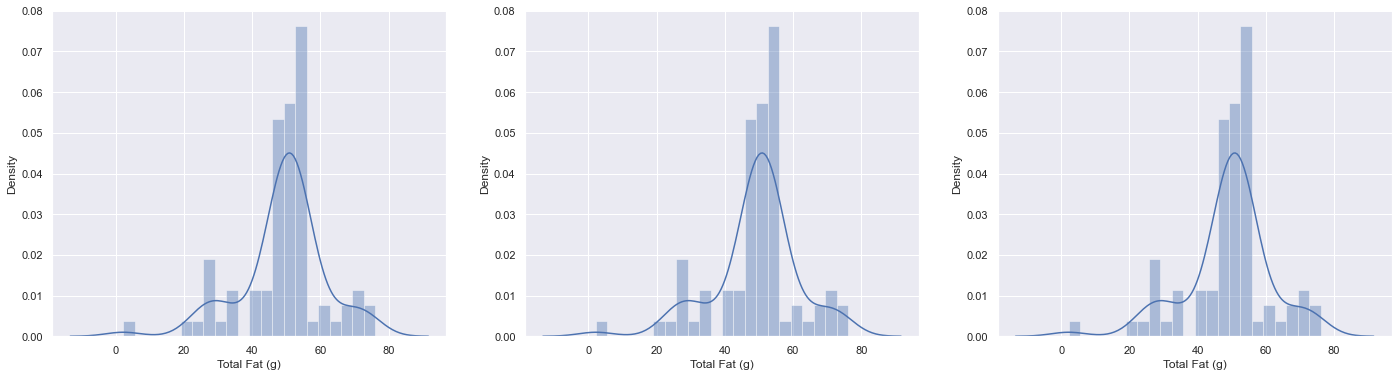

In [5]:
sns.set_theme()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))

food = "nuts"
nutrient = "Total Fat (g)"
data = nutrition[nutrition["Category 2"] == food][nutrient]

sns.distplot(data, ax = ax1)
sns.distplot(data, ax = ax2)
sns.distplot(data, ax = ax3)

In [6]:
path_2 = fo.path_to_folder(2, "data")
filename_2 = "daily_intakes.csv"

women_30 = md.get_daily_intake_data(path_2, filename_2, "female", 30)

In [7]:
nutrition.sort_values(by = "Protein (g)", ascending = False).head(20)

,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Zinc (mg),Energy (kcal),Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg),Category 2,Category 3
Food name,,,,,,,,,,,,,,,,,,,,,
"Nutritional powder mix, whey based, NFS",9802,Protein and nutritional powders,78.13,3.44,3.1,0,0.609,2.017,1.136,0.607,...,6.18,352,1.56,0.781,0.158,0.299,16,0.0,None,None
"Nutritional powder mix, protein, NFS",9802,Protein and nutritional powders,78.13,3.44,3.1,0,0.609,2.017,1.136,0.607,...,6.18,352,1.56,0.781,0.158,0.299,16,0.0,None,None
"Tuna, fresh, dried",2402,Fish,76.25,18.84,0.0,51,0.332,0.341,54.848,2.624,...,1.16,341,1.53,0.538,0.363,0.459,122,5.3,fish,animal
Nutritional powder mix (EAS Whey Protein Powder),9802,Protein and nutritional powders,66.67,6.61,0.0,15,0.714,0.857,10.000,1.000,...,7.14,385,5.13,2.564,0.281,0.926,205,0.0,None,None
"Salmon, dried",2402,Fish,64.06,23.50,0.0,98,0.225,0.312,23.735,1.718,...,1.22,397,13.75,2.531,4.212,2.534,144,34.1,fish,animal
"Cod, dried, salted",2402,Fish,62.82,16.14,0.0,42,0.268,0.240,7.500,0.864,...,1.59,290,2.37,0.462,0.342,0.804,152,4.0,fish,animal
"Fish, NS as to type, dried",2402,Fish,62.82,16.14,0.0,42,0.268,0.240,7.500,0.864,...,1.59,290,2.37,0.462,0.342,0.804,152,4.0,fish,animal
Pork skin rinds,2006,Pork,61.30,1.80,0.0,12,0.099,0.283,1.549,0.023,...,0.56,544,31.30,11.370,14.780,3.640,95,0.0,meats,animal
"Squid, dried",2404,Shellfish,58.94,16.96,0.0,32,0.068,1.247,7.817,0.201,...,5.79,348,5.22,1.354,0.405,1.982,882,0.0,fish,animal


In [8]:
soy = nutrition.loc["Textured vegetable protein, dry"][md.nutrients_filter_2(1)]
tuna = nutrition.loc["Tuna, fresh, dried"][md.nutrients_filter_2(1)]
soy

Protein (g)                 51.46
Water (g)                    7.25
Fiber, total dietary (g)     17.5
Vitamin A, RAE (mcg_RAE)        2
Thiamin (mg)                0.698
Riboflavin (mg)             0.253
Niacin (mg)                 2.612
Vitamin B-6 (mg)            0.574
Vitamin B-12 (mcg)            0.0
Folate, total (mcg)           305
Vitamin C (mg)                0.0
Calcium (mg)                  241
Iron (mg)                    9.24
Magnesium (mg)                290
Potassium (mg)               2384
Sodium (mg)                    20
Zinc (mg)                    2.46
Name: Textured vegetable protein, dry, dtype: object

In [9]:
comparison = md.foodquality(women_30, [soy, tuna])
comparison

,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Vitamin B-12 (mcg),"Folate, total (mcg)",Vitamin C (mg),Calcium (mg),Iron (mg),Magnesium (mg),Potassium (mg),Sodium (mg),Zinc (mg)
Daily_Intake,46.0,2100.0,25.0,700.0,1.1,1.1,14.0,1.3,2.4,400.0,45.0,1000.0,18.0,310.0,2800.0,460.0,8.0
"Textured vegetable protein, dry",51.46,7.25,17.5,2,0.698,0.253,2.612,0.574,0.0,305,0.0,241,9.24,290,2384,20,2.46
"%OfDI_Textured vegetable protein, dry",111.869565,0.345238,70.0,0.285714,63.454545,23.0,18.657143,44.153846,0.0,76.25,0.0,24.1,51.333333,93.548387,85.142857,4.347826,30.75
"Tuna, fresh, dried",76.25,18.84,0.0,51,0.332,0.341,54.848,2.624,5.85,6,0.0,12,2.41,109,1378,141,1.16
"%OfDI_Tuna, fresh, dried",165.76087,0.897143,0.0,7.285714,30.181818,31.0,391.771429,201.846154,243.75,1.5,0.0,1.2,13.388889,35.16129,49.214286,30.652174,14.5


In [10]:
comparison.iloc[2].name

'%OfDI_Textured vegetable protein, dry'

In [11]:
food1_values = comparison.iloc[2]
food1_values.name = "Values"
food1_name = pd.Series(["Soy" for x in range(len(food1_values))], index = food1_values.index, name = "Item")
food1 = pd.concat([food1_name, food1_values], axis = 1)

food2_values = comparison.iloc[4]
food2_values.name = "Values"
food2_name = pd.Series(["Tuna" for x in range(len(food2_values))], index = food2_values.index, name = "Item")
food2 = pd.concat([food2_name, food2_values], axis = 1)

to_compare = pd.concat([food1, food2])
to_compare

,Item,Values
Protein (g),Soy,111.869565
Water (g),Soy,0.345238
"Fiber, total dietary (g)",Soy,70.0
"Vitamin A, RAE (mcg_RAE)",Soy,0.285714
Thiamin (mg),Soy,63.454545
Riboflavin (mg),Soy,23.0
Niacin (mg),Soy,18.657143
Vitamin B-6 (mg),Soy,44.153846
Vitamin B-12 (mcg),Soy,0.0
"Folate, total (mcg)",Soy,76.25


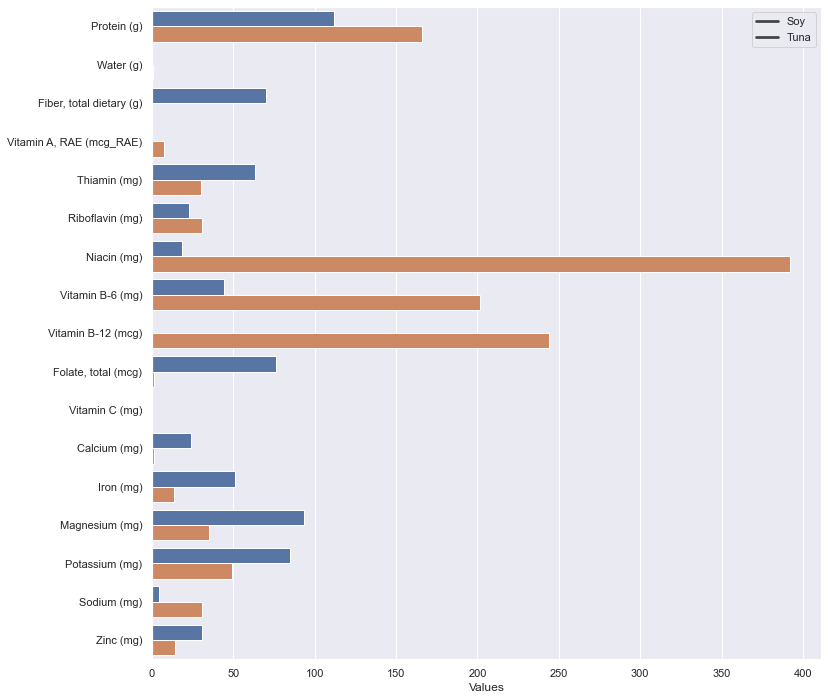

In [12]:
sns.set_theme()

plt.figure(figsize = (12, 12))

sns.barplot(x = "Values", y = to_compare.index, data = to_compare, hue = "Item")
#sns.barplot(x = comparison.columns, y = comparison.iloc[4], color = "lightsteelblue")

#plt.xticks(rotation = 90)
plt.legend(["Soy", "Tuna"])

plt.show()

<Figure size 864x864 with 0 Axes>

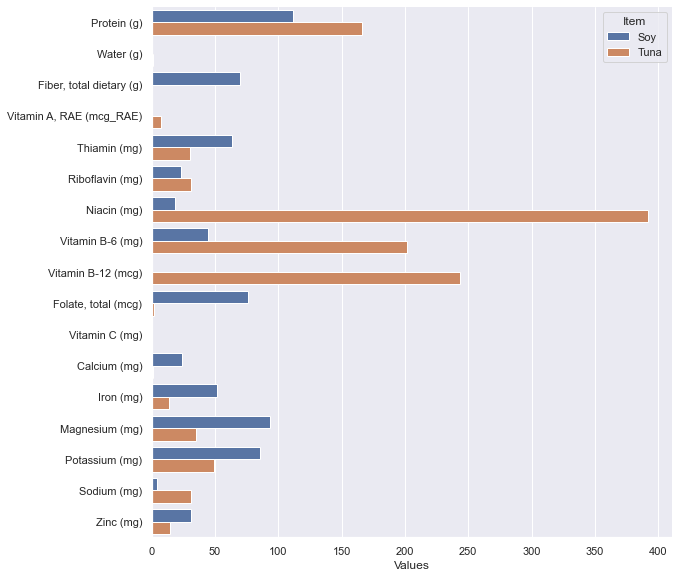

In [13]:
sns.set_theme()

plt.figure(figsize = (12, 12))

sns.catplot(x = "Values", y = to_compare.index, data = to_compare, hue = "Item", kind = "bar", height = 8, aspect = 1.2, legend_out = False)


In [14]:
def foodquality(dailyintake, foods):
    df = pd.DataFrame(dailyintake)
    count = 1
    for food in foods:
        if len(food) == len(dailyintake):
            df = pd.merge(df, food, how = "outer", left_index = True, right_index = True)
            df["%OfDI_" + food.name] = (food / dailyintake) * 100
            count += 1

    return df.T

In [15]:
foodquality(women_30, [soy])

,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Vitamin B-12 (mcg),"Folate, total (mcg)",Vitamin C (mg),Calcium (mg),Iron (mg),Magnesium (mg),Potassium (mg),Sodium (mg),Zinc (mg)
Daily_Intake,46.0,2100.0,25.0,700.0,1.1,1.1,14.0,1.3,2.4,400.0,45.0,1000.0,18.0,310.0,2800.0,460.0,8.0
"Textured vegetable protein, dry",51.46,7.25,17.5,2,0.698,0.253,2.612,0.574,0.0,305,0.0,241,9.24,290,2384,20,2.46
"%OfDI_Textured vegetable protein, dry",111.869565,0.345238,70.0,0.285714,63.454545,23.0,18.657143,44.153846,0.0,76.25,0.0,24.1,51.333333,93.548387,85.142857,4.347826,30.75


In [16]:
def transformation_for_barplot(quality_df):
    count = 2
    list_of_series = []

    while count < len(quality_df):
        food_values = quality_df.iloc[count]
        food_values.name = "Values"

        food_name = pd.Series([quality_df.iloc[count].name for x in range(len(food_values))], index = food_values.index, name = "Item")

        food = pd.concat([food_values, food_name], axis = 1)
        list_of_series.append(food)

        count += 2

    barplot_df = pd.concat(list_of_series)
    return barplot_df

In [17]:
quality_df = foodquality(women_30, [soy, tuna])
barplot_ready = transformation_for_barplot(quality_df)

In [18]:
barplot_ready

,Values,Item
Protein (g),111.869565,"%OfDI_Textured vegetable protein, dry"
Water (g),0.345238,"%OfDI_Textured vegetable protein, dry"
"Fiber, total dietary (g)",70.0,"%OfDI_Textured vegetable protein, dry"
"Vitamin A, RAE (mcg_RAE)",0.285714,"%OfDI_Textured vegetable protein, dry"
Thiamin (mg),63.454545,"%OfDI_Textured vegetable protein, dry"
Riboflavin (mg),23.0,"%OfDI_Textured vegetable protein, dry"
Niacin (mg),18.657143,"%OfDI_Textured vegetable protein, dry"
Vitamin B-6 (mg),44.153846,"%OfDI_Textured vegetable protein, dry"
Vitamin B-12 (mcg),0.0,"%OfDI_Textured vegetable protein, dry"
"Folate, total (mcg)",76.25,"%OfDI_Textured vegetable protein, dry"


In [42]:
type(barplot_ready["Values"])

pandas.core.series.Series

<Figure size 864x864 with 0 Axes>

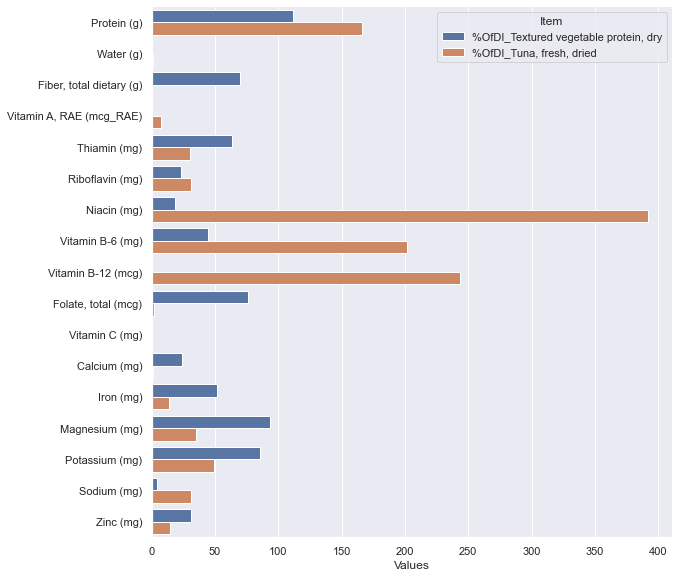

In [19]:
sns.set_theme()

plt.figure(figsize = (12, 12))

sns.catplot(x = "Values", y = barplot_ready.index, data = barplot_ready, hue = "Item", kind = "bar", height = 8, aspect = 1.2, legend_out = False)

In [87]:
soy_full = nutrition.loc["Textured vegetable protein, dry"][md.nutrients_filter_2(2)]
soy_full.name = "values"
soy_full = soy_full.reset_index()
soy_full["food"] = "Textured vegetable protein, dry"

tuna_full = nutrition.loc["Tuna, fresh, dried"][md.nutrients_filter_2(2)]
tuna_full.name = "values"
tuna_full = tuna_full.reset_index()
tuna_full["food"] = "una, fresh, dried"


test = pd.concat([soy_full, tuna_full], axis = 0)
test

,index,values,food
0,Energy (kcal),327,"Textured vegetable protein, dry"
1,Total Fat (g),1.22,"Textured vegetable protein, dry"
2,"Fatty acids, total saturated (g)",0.136,"Textured vegetable protein, dry"
3,"Fatty acids, total monounsaturated (g)",0.208,"Textured vegetable protein, dry"
4,"Fatty acids, total polyunsaturated (g)",0.533,"Textured vegetable protein, dry"
5,Cholesterol (mg),0,"Textured vegetable protein, dry"
6,Vitamin D (D2 + D3) (mcg),0.0,"Textured vegetable protein, dry"
0,Energy (kcal),341,"una, fresh, dried"
1,Total Fat (g),1.53,"una, fresh, dried"
2,"Fatty acids, total saturated (g)",0.538,"una, fresh, dried"


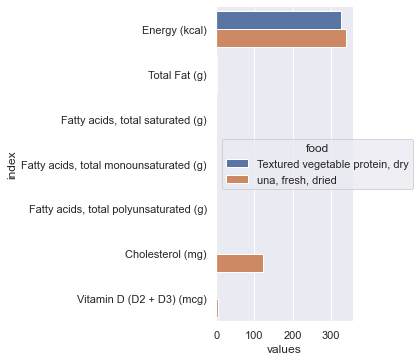

In [90]:
sns.set_theme()

x = "index"
y = "values"
hue = "food"

sns.catplot(x = y, y = x, data = test, hue = hue, kind = "bar", legend_out = False)


<Figure size 864x864 with 0 Axes>

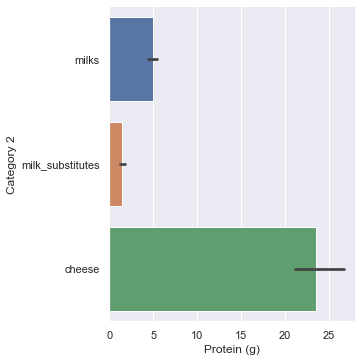

In [60]:
sns.set_theme()

plt.figure(figsize = (12, 12))

x = soy_full.index.values
y = soy_full.values

sns.catplot(x = "Protein (g)", y = "Category 2", data = nutrition.head(500), kind = "bar")

In [49]:
soy_full.index

Index(['Energy (kcal)', 'Total Fat (g)', 'Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)',
       'Vitamin D (D2 + D3) (mcg)'],
      dtype='object')